<a href="https://colab.research.google.com/github/ErhanBULUT60/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#install TensorFlow
!pip install  tensorflow==2.14.0rc1
import tensorflow as tf
print(tf.__version__)

2.14.0-rc1


In [19]:
#additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [20]:
#Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [21]:
# the data is only 2d
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [22]:
# number of classes
K = len(set(y_test))
print("number of classes", K)

number of classes 10


In [23]:
from tensorflow.python.ops.gen_nn_ops import conv2d
# Building model using api
i = Input(shape=x_train[0].shape)
x= Conv2D(32, (3,3), strides=2, activation='relu')(i)
x= Conv2D(64,(3,3), strides=2, activation='relu')(x)
x= Conv2D(128,(3,3), strides=2, activation='relu')(x)
x= Flatten()(x)
x= Dropout(0.2)(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

model = Model(i,x)


In [24]:
# Compile and Fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r= model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5636 - accuracy: 0.8042 - val_loss: 0.4479 - val_accuracy: 0.8305
Epoch 2/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3990 - accuracy: 0.8509 - val_loss: 0.3882 - val_accuracy: 0.8532
Epoch 3/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3613 - accuracy: 0.8643 - val_loss: 0.3718 - val_accuracy: 0.8594
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3353 - accuracy: 0.8725 - val_loss: 0.3638 - val_accuracy: 0.8641
Epoch 5/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3165 - accuracy: 0.8812 - val_loss: 0.3565 - val_accuracy: 0.8694
Epoch 6/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3007 - accuracy: 0.8876 - val_loss: 0.3769 - val_accuracy: 0.8676
Epoch 7/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2963 - accuracy: 0.8889 - val_loss: 0.3585 -

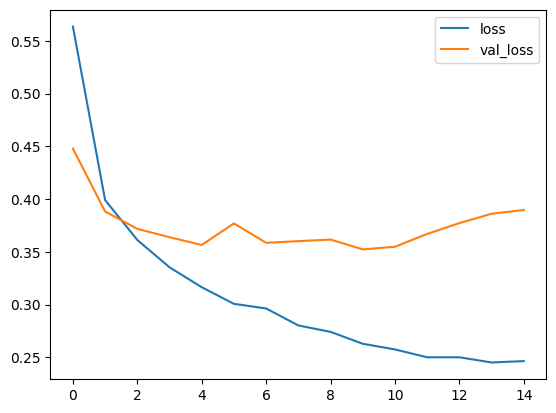

In [25]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

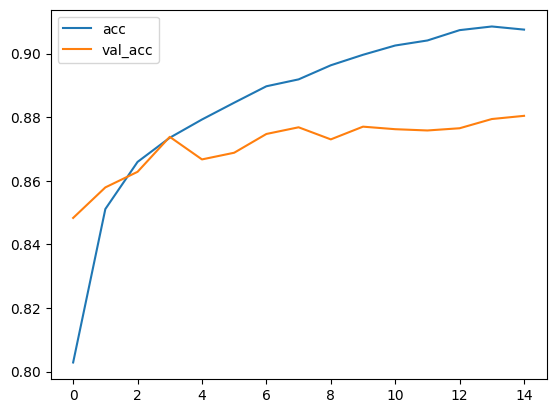

In [10]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix without normalization
[[823   1  30  24   3   1 106   0  12   0]
 [  2 965   1  23   1   0   6   0   2   0]
 [ 13   0 842  10  57   0  72   0   6   0]
 [ 10   4  26 898  29   0  30   0   3   0]
 [  1   1  88  28 763   0 118   0   1   0]
 [  1   0   0   1   0 959   0  28   2   9]
 [119   0  90  30  82   1 660   0  18   0]
 [  0   0   0   0   0  10   0 980   0  10]
 [  0   0   4   5   3   1   3   4 980   0]
 [  0   0   0   0   0   2   0  74   2 922]]


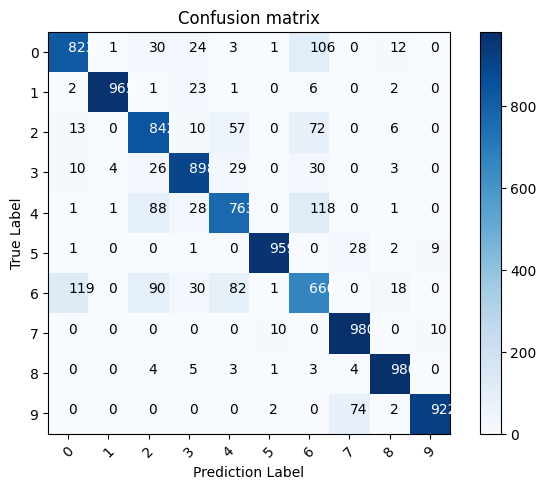

In [34]:
from matplotlib.hatch import HorizontalHatch
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
      cm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j,i, format(cm[i,j], fmt), color='white' if cm[i,j]> thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Prediction Label')
  plt.show()

p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [36]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

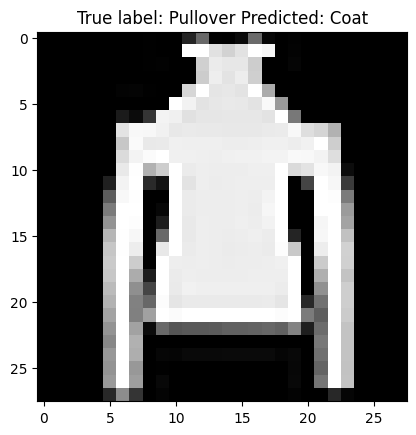

In [38]:
#Some misclassified example
misclassified_idx=np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]],labels[p_test[i]]));